In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_ml = pd.read_csv(r"/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data_ml.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Sélection des changements importants (Features)
data_ml = data_ml[[
    "Age",
    "Gender",
    "JobRole",
    "MonthlyIncome",
    "OverTime",
    "JobSatisfaction",
    "WorkLifeBalance",
    "YearsAtCompany",
    "Education",
    "Attrition"
]]

In [4]:
data_ml.head()

,Age,Gender,JobRole,MonthlyIncome,OverTime,JobSatisfaction,WorkLifeBalance,YearsAtCompany,Education,Attrition
0,41,Female,Sales Executive,5993,Yes,4,1,6,2,Yes
1,49,Male,Research Scientist,5130,No,2,3,10,1,No
2,37,Male,Laboratory Technician,2090,Yes,3,3,0,2,Yes
3,33,Female,Research Scientist,2909,Yes,3,3,8,4,No
4,27,Male,Laboratory Technician,3468,No,2,3,2,1,No


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
# Convertissez les valeurs de texte en nombres à l'aide de LabelEncoder
le = LabelEncoder()
categorical_cols = ['Gender', 'OverTime', 'JobRole', 'Attrition']
for col in categorical_cols :
  data_ml[col] = le.fit_transform(data_ml[col])

In [7]:
data_ml.head()

,Age,Gender,JobRole,MonthlyIncome,OverTime,JobSatisfaction,WorkLifeBalance,YearsAtCompany,Education,Attrition
0,41,0,7,5993,1,4,1,6,2,1
1,49,1,6,5130,0,2,3,10,1,0
2,37,1,2,2090,1,3,3,0,2,1
3,33,0,6,2909,1,3,3,8,4,0
4,27,1,2,3468,0,2,3,2,1,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
x = data_ml.drop('Attrition', axis=1)
y = data_ml['Attrition']

In [10]:
X_train , X_test ,y_train ,y_test = train_test_split(x ,y ,test_size=0.2 ,random_state=42 ,stratify=y)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (1176, 9)
Test shape: (294, 9)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test_scaled)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8401360544217688

Confusion Matrix:
 [[239   8]
 [ 39   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.50      0.17      0.25        47

    accuracy                           0.84       294
   macro avg       0.68      0.57      0.58       294
weighted avg       0.80      0.84      0.81       294



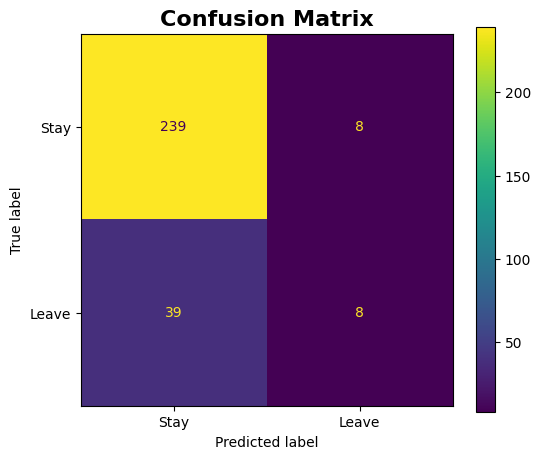

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Regenerate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#  confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Leave"])

plt.figure(figsize=(6, 5))
disp.plot(ax=plt.gca())
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

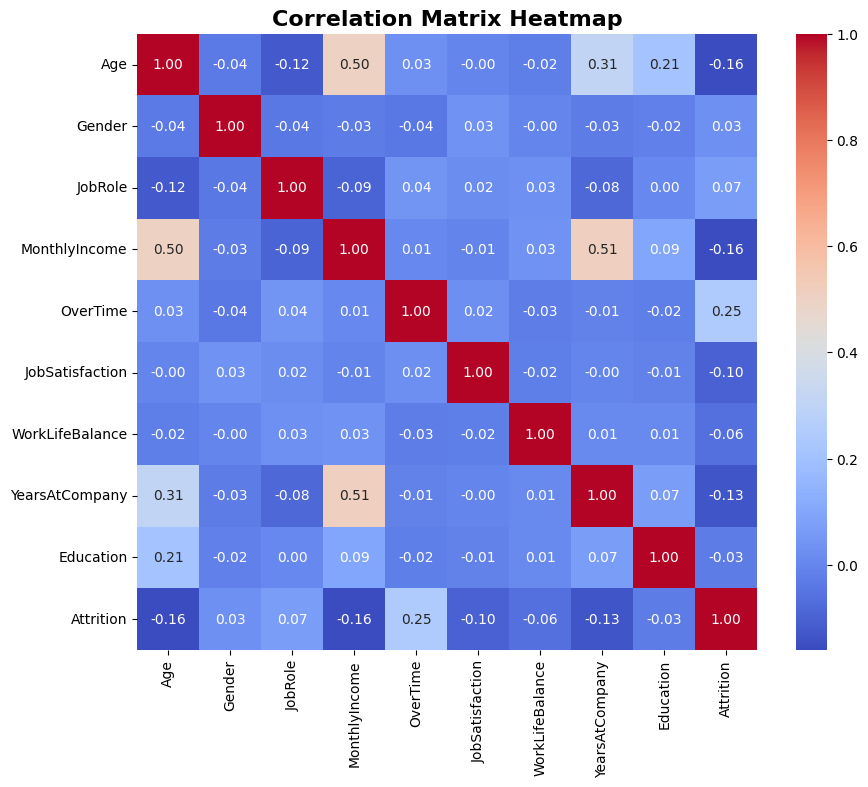

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_ml.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=16, fontweight='bold')
plt.show()

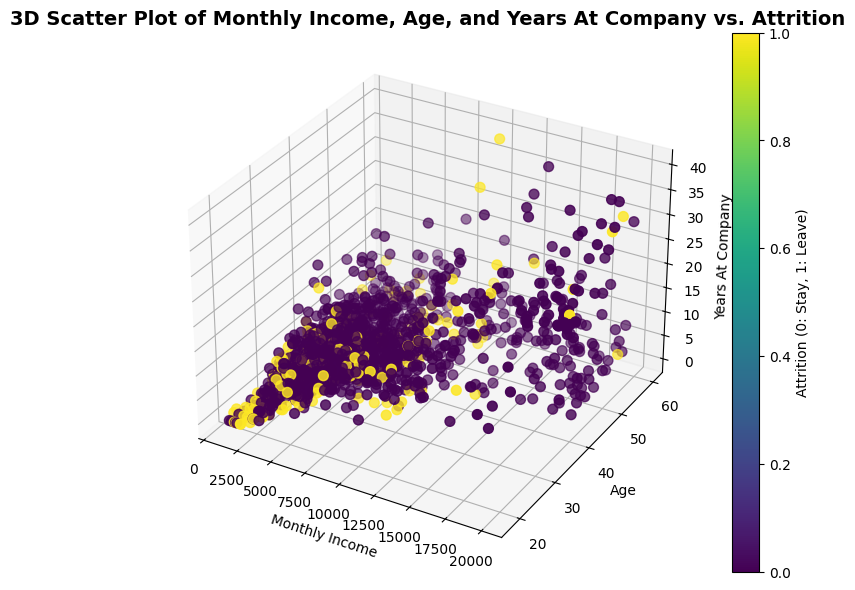

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'MonthlyIncome', 'Age', and 'YearsAtCompany' are the top 3 features
x_data = data_ml['MonthlyIncome']
y_data = data_ml['Age']
z_data = data_ml['YearsAtCompany']
colors = data_ml['Attrition'] # Use 'Attrition' to color the points

scatter = ax.scatter(x_data, y_data, z_data, c=colors, cmap='viridis', s=50)

ax.set_xlabel('Monthly Income')
ax.set_ylabel('Age')
ax.set_zlabel('Years At Company')
plt.title('3D Scatter Plot of Monthly Income, Age, and Years At Company vs. Attrition', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Attrition (0: Stay, 1: Leave)')
plt.show()

In [20]:
feature_names = x.columns
feature_names

Index(['Age', 'Gender', 'JobRole', 'MonthlyIncome', 'OverTime',
       'JobSatisfaction', 'WorkLifeBalance', 'YearsAtCompany', 'Education'],
      dtype='object')

In [21]:
importances = model.feature_importances_
importances

array([0.19663348, 0.03502506, 0.09127606, 0.25340403, 0.06193256,
       0.07120432, 0.07518751, 0.14201893, 0.07331804])

In [22]:
indices = np.argsort(importances)[::-1]
indices

array([3, 0, 7, 2, 6, 8, 5, 4, 1])

/tmp/ipython-input-1366166005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


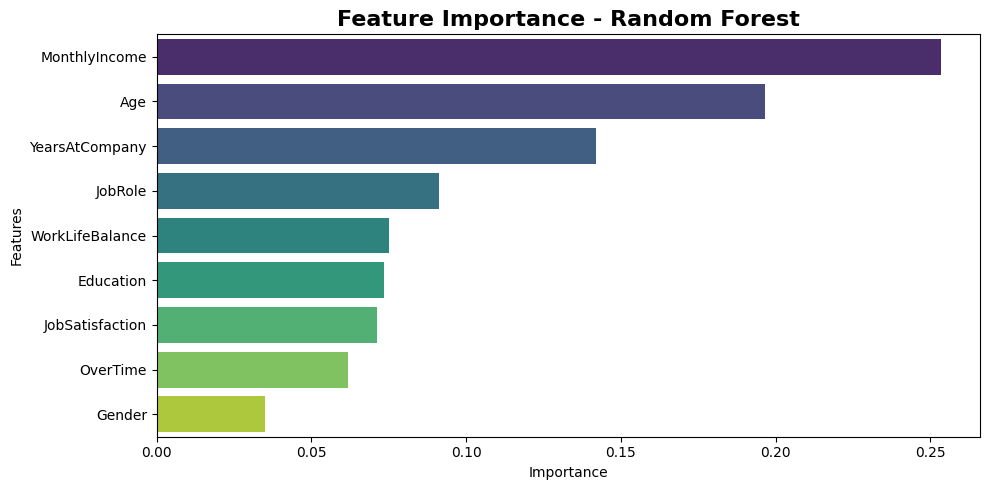

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Feature Importance - Random Forest", fontsize=16, fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [24]:
pip install xgboost

In [25]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)


y_pred_xgb = xgb_model.predict(X_test_scaled)


print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8231292517006803

Confusion Matrix:
 [[232  15]
 [ 37  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.40      0.21      0.28        47

    accuracy                           0.82       294
   macro avg       0.63      0.58      0.59       294
weighted avg       0.79      0.82      0.80       294



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [23:03:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


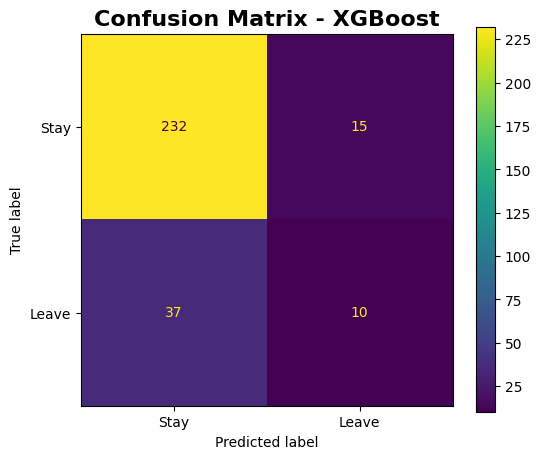

In [26]:

# Regenerate the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["Stay", "Leave"])

plt.figure(figsize=(6, 5))
disp_xgb.plot(ax=plt.gca())
plt.title("Confusion Matrix - XGBoost", fontsize=16, fontweight='bold')
plt.show()

In [27]:
import joblib

# حفظ النموذج
joblib.dump(xgb_model, 'xgb_attrition_model.pkl')

# حفظ الـ Scaler كذلك
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [28]:
import pandas as pd
import joblib

# Load the saved model and scaler
model = joblib.load("xgb_attrition_model.pkl")
scaler = joblib.load("scaler.pkl")

# Create a DataFrame for a new employee
new_employee = pd.DataFrame([{
    'Age': 28,
    'Gender': 1,                 # Male (assuming 1 is Male based on your LabelEncoding)
    'JobRole': 7,                # Sales Executive (based on your LabelEncoding)
    'MonthlyIncome': 3500,
    'OverTime': 1,               # Yes (assuming 1 is Yes based on your LabelEncoding)
    'JobSatisfaction': 2,
    'WorkLifeBalance': 2,
    'YearsAtCompany': 1,
    'Education': 3               # Bachelor (based on your LabelEncoding)
}])

# Scale the new employee data using the loaded scaler
new_scaled = scaler.transform(new_employee)

# Make a prediction using the loaded model
prediction = model.predict(new_scaled)[0]
proba = model.predict_proba(new_scaled)[0][1]

# Print the prediction and confidence level
print("🔍 Prediction:", "Attrition (Will Leave)" if prediction == 1 else "No Attrition (Will Stay)")
print(f"✅ Confidence: {proba*100:.2f}%")

# Example with another new employee
another_employee = pd.DataFrame([{
    'Age': 45,
    'Gender': 0,                 # Female
    'JobRole': 0,                # Healthcare Representative
    'MonthlyIncome': 10000,
    'OverTime': 0,               # No
    'JobSatisfaction': 4,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 15,
    'Education': 4               # Master
}])

# Scale the new employee data
another_scaled = scaler.transform(another_employee)

# Make a prediction
another_prediction = model.predict(another_scaled)[0]
another_proba = model.predict_proba(another_scaled)[0][1]

# Print the prediction and confidence level for the second employee
print("\n--- Another Employee ---")
print("🔍 Prediction:", "Attrition (Will Leave)" if another_prediction == 1 else "No Attrition (Will Stay)")
print(f"✅ Confidence: {another_proba*100:.2f}%")

🔍 Prediction: Attrition (Will Leave)
✅ Confidence: 77.32%

--- Another Employee ---
🔍 Prediction: No Attrition (Will Stay)
✅ Confidence: 13.85%
